In [69]:
#https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt
def chi(t,ts, r):
    #for i in range (0,len(t)):
    if t > ts:
        val = r
        return val
    else:
        return 0

def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for t_temp in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt - chi(t_temp,ts,r)*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [70]:
# Define parameters
N = 10000
ts = 20
r = (1 - 1/N)/100
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

(0, 200)

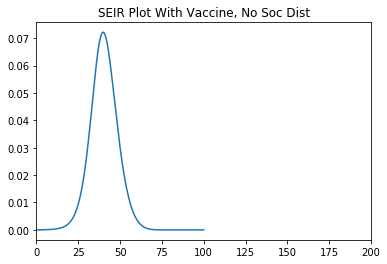

In [71]:
plt.plot(t,results[:,2])
#plt.plot(t, .1)
plt.title("SEIR Plot With Vaccine, No Soc Dist")
plt.xlim(0,200)

In [72]:
def chi(t,ts, r):
    #for i in range (0,len(t)):
    if t > ts:
        val = r
        return val
    else:
        return 0
    
def seir_model_with_soc_dist_vax(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho , ts, r = params
    dt = t[1] - t[0]
    for t_temp in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt - chi(t_temp,ts,r)*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [73]:
# Define parameters
N = 10000
ts = 50
r = (1 - 1/N)/100
t_max = 500
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.5
params = alpha, beta, gamma,rho, ts, r
# Run simulation
results = seir_model_with_soc_dist_vax(init_vals, params, t)

(0, 500)

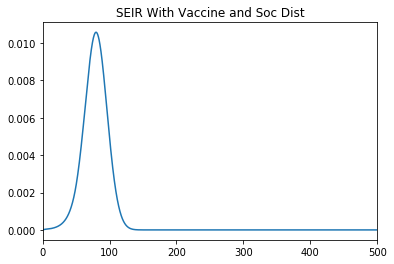

In [74]:
plt.plot(t,results[:,2])
plt.title("SEIR With Vaccine and Soc Dist")
plt.xlim(0,500)